# HABERMAN CANCER SURVIVAL

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
1. #read data
cancer = pd.read_csv('haberman.csv')
cancer.columns = 'age' , 'year' , 'nodes' , 'survival'
cancer.head()

,age,year,nodes,survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [15]:
2. #how many members data and features we have

cancer.shape

#305 members and 4 features

(305, 4)

In [17]:
3. #is it a balanced or Imbalnced dataset

cancer['survival'].value_counts()

#Imbalanced

1    224
2     81
Name: survival, dtype: int64

# Objective: To see if a patient survived 5 years after cancer treatment

survival = 1 - yes, survived 5 or more years
survival = 2 - no

Questions:

in data we know some of them died before 5 years and some were good enough to live past five years so what was the reason that some were able to live past 5 years

is it age?? or is it no. of auxillary node??

lets see if we can graphically interpret data to find answers

# Insights From Data

In [31]:
#what was the minimum and maximum age that didnot survive 5years
cancer.age[cancer['survival'] == 2].describe()

#min = 34 years
#max = 83 years
#total of 81 patients didnt survive 5years

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

In [51]:
#what was the minimum and maximum age that survived 5years or more

cancer.age[cancer['survival'] == 1].describe()

#min = 30
#max = 77


count    224.000000
mean      52.116071
std       10.937446
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [54]:
#number of nodes in minimum and maximum year patients that did not survive 5years

cancer.nodes[(cancer['age']==83) & (cancer['survival']==2)]

#node in max age = 2


304    2
Name: nodes, dtype: int64

In [56]:
cancer.nodes[(cancer['age']== 34) & (cancer['survival']==2)]
#number of nodes in min age patients = 0, 9.


6    0
7    9
Name: nodes, dtype: int64

In [57]:
#number of nodes in minimum and maximum year patients that survived 5years

cancer.nodes[(cancer['age']==77) & (cancer['survival']==1)]

#node in max age = 3


302    3
Name: nodes, dtype: int64

In [58]:
cancer.nodes[(cancer['age']==30) & (cancer['survival']==1)]
#number of nodes in min age patients = 0, 3.

0    3
1    0
Name: nodes, dtype: int64

In [50]:
#number of nodes in patients not survived
cancer.nodes[cancer['survival']==2].value_counts()

#max num of patients had zero nodes but still they died before 5 years

0     19
1      8
3      7
2      5
9      4
5      4
13     4
23     3
4      3
6      3
11     3
19     2
15     2
7      2
8      2
52     1
10     1
35     1
14     1
17     1
20     1
21     1
22     1
24     1
12     1
Name: nodes, dtype: int64

In [65]:
#patients who have zero auxillary nodes

cancer[cancer['nodes'] == 0].describe()

#136

,age,year,nodes,survival
count,136.000000,136.000000,136.0,136.000000
mean,53.705882,63.102941,0.0,1.139706
std,11.247464,3.181612,0.0,0.347963
min,30.000000,58.000000,0.0,1.000000
25%,44.000000,60.000000,0.0,1.000000
50%,54.000000,63.000000,0.0,1.000000
75%,63.000000,66.000000,0.0,1.000000
max,76.000000,69.000000,0.0,2.000000


In [63]:
cancer[(cancer['nodes'] == 0) & (cancer['survival'] == 2)].describe()

#19 patients didnot survive despite have 0 auxillary nodes

,age,year,nodes,survival
count,19.000000,19.000000,19.0,19.0
mean,51.421053,62.526316,0.0,2.0
std,11.634794,3.151162,0.0,0.0
min,34.000000,58.000000,0.0,2.0
25%,42.500000,59.000000,0.0,2.0
50%,47.000000,64.000000,0.0,2.0
75%,61.500000,65.000000,0.0,2.0
max,72.000000,67.000000,0.0,2.0


# Observations From dataset:

1. its an unbalanced dataset.


2. patients range in age of 30 to 83. Max age is 83 and didnt survive 5 years and min age is 30 and has two persons, both survived 5 years or more.


3. out of 305 members 136 members have zero auxillary nodes with max age = 76 and min age = 30 and 19 members did not survive 5 years


4. any person who did not survive minimum 5 years have an age max 72 and age min of 34

# Graphical Understanding of Data

lets have graphical understanding of datas to get some insights

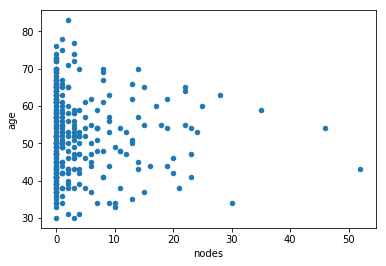

In [78]:
cancer.plot(kind= 'scatter', x='nodes', y='age')

#cant understand data since all data are in same colour

# BI-variate Analysis (scatterplot, pairplots)

# scatter plots

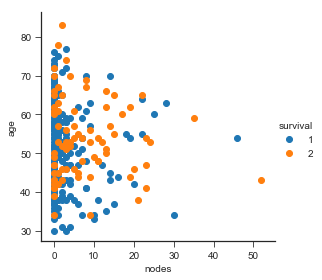

In [91]:
#scatter plot with different colour based on survival
sns.set_style('ticks')
sns.FacetGrid(cancer, hue=('survival') , size=4) \
.map(plt.scatter, 'nodes' , 'age') \
.add_legend()


# Pair plots

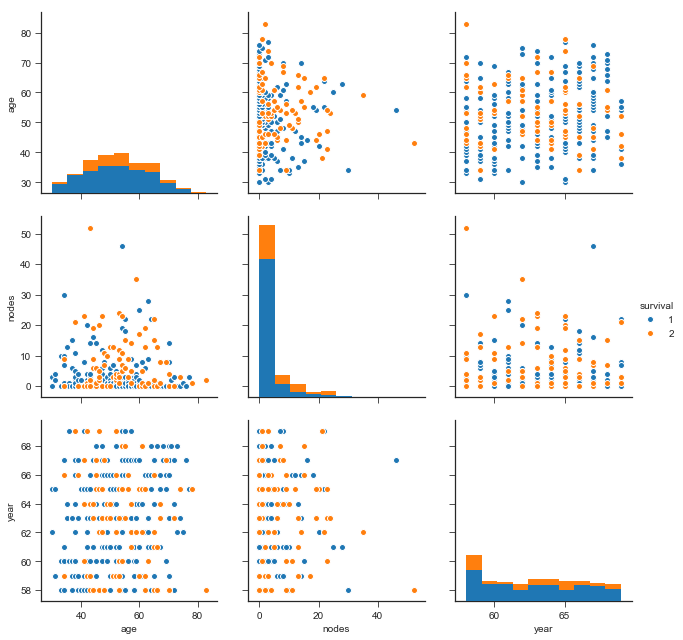

In [105]:
sns.set_style('ticks')
sns.pairplot(cancer, hue='survival', vars = ('age', 'nodes', 'year'), size=3) 
#vars = ('Columns must be given or it'll calculate pairplots for all columns since it is imbalanced datasets)

**observations**
1. From the data and information we have, irrespective of operating year, we want the patient to survive 5 years. so, the year of operation is not a good varible to say if a patient will survive 5years or more.(so it is not considered)

2. age and number of auxillary nodes are the important features.

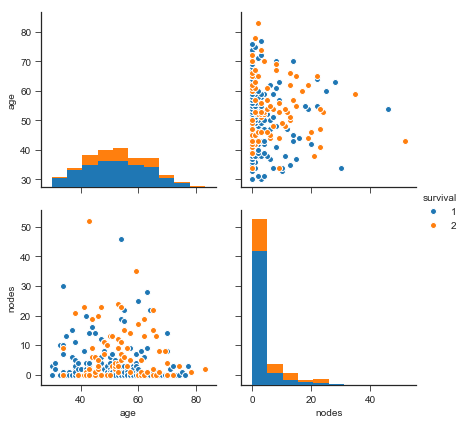

In [106]:
sns.set_style('ticks')
sns.pairplot(cancer, hue='survival', vars = ('age', 'nodes'), size=3) 
#vars = ('Columns must be given or it'll calculate pairplots for all columns since it is imbalanced datasets)

since the points are very diversified, its very hard to interpret the results from above graph. so lets use some other technique

# Histogram, PDF, CDF

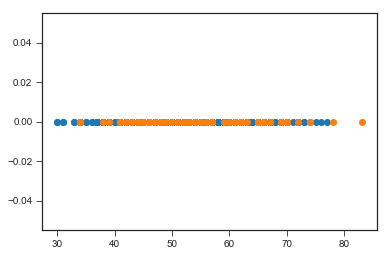

In [145]:
#1d scatter plot
#divide cancer dataset into two based on survival status 1 & 2 using .loc
cancer_1 = cancer.loc[cancer['survival'] == 1]
cancer_2 = cancer.loc[cancer['survival'] == 2]
#now plot new dataset w.r.t age and nodes of patients in one dimension
plt.plot(cancer_1['age'], np.zeros_like(cancer_1['age']), 'o' , Label="1")
plt.plot(cancer_2['age'], np.zeros_like(cancer_2['age']), 'o' , label="2")

**observation**
1. from 1D plot we can see that most of the people that didnt survive five years range from age 40 to age70(90%)

C:\Users\Aravindh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aravindh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


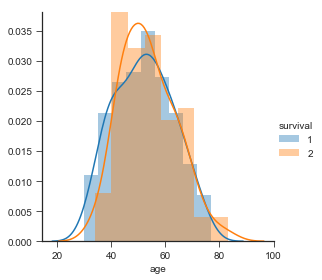

In [110]:
sns.FacetGrid(cancer, hue='survival', size=4) \
.map(sns.distplot, 'age') \
.add_legend()

C:\Users\Aravindh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aravindh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


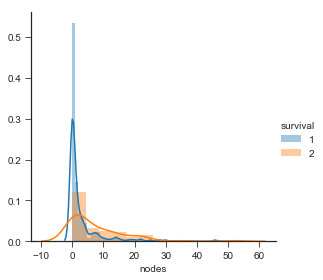

In [111]:
sns.FacetGrid(cancer, hue='survival', size=4) \
.map(sns.distplot, 'nodes') \
.add_legend()

# CDF 

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


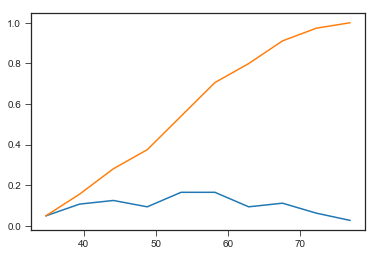

In [157]:
#CDF
counts, bin_edges = np.histogram(cancer_1['age'], bins=10, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


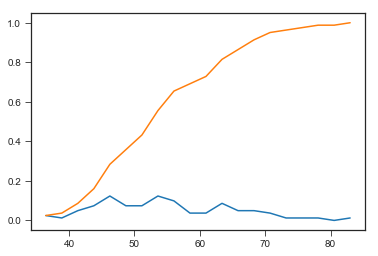

In [175]:
#CDF
counts, bin_edges = np.histogram(cancer_2['age'], bins=20, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.01785714 0.03125    0.04464286 0.0625     0.04464286 0.08035714
 0.04017857 0.05357143 0.09821429 0.06696429 0.07589286 0.08928571
 0.04910714 0.04464286 0.08035714 0.03125    0.02232143 0.04017857
 0.01339286 0.01339286]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


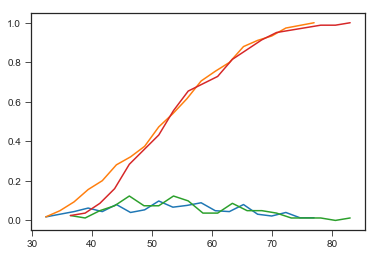

In [172]:
#cdf on age with peoples survived and those didnt
#CDF
counts, bin_edges = np.histogram(cancer_1['age'], bins=20, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#CDF
counts, bin_edges = np.histogram(cancer_2['age'], bins=20, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.73214286 0.10267857 0.02678571 0.05357143 0.01339286 0.00892857
 0.02232143 0.00446429 0.00892857 0.00892857 0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.00446429]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


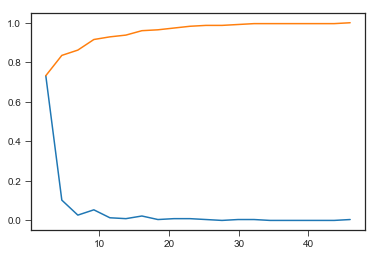

In [177]:
#cdf on auxillary nodes with peoples survived and those didnt
#CDF
counts, bin_edges = np.histogram(cancer_1['nodes'], bins=20, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


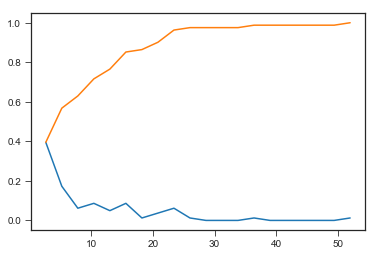

In [178]:
#CDF
counts, bin_edges = np.histogram(cancer_2['nodes'], bins=20, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.73214286 0.10267857 0.02678571 0.05357143 0.01339286 0.00892857
 0.02232143 0.00446429 0.00892857 0.00892857 0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.00446429]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


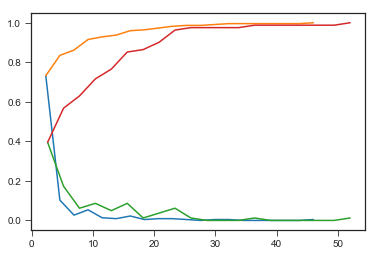

In [179]:
#Combined cdf on nodes with peoples survived and those didnt
#CDF
counts, bin_edges = np.histogram(cancer_1['nodes'], bins=20, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#CDF
counts, bin_edges = np.histogram(cancer_2['nodes'], bins=20, density=True,)

#calculate PDF & Bin_edges
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#plot CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Box plot

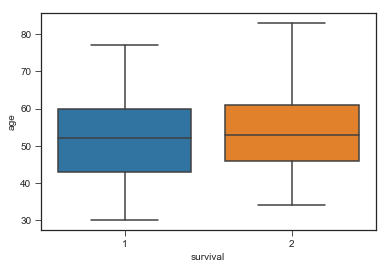

In [184]:
#boxplot
sns.boxplot(x='survival', y='age', data=cancer)

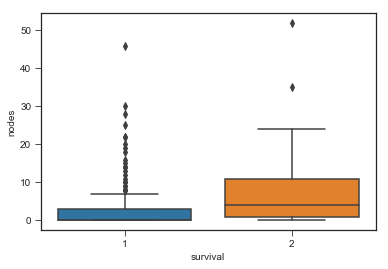

In [185]:
sns.boxplot(data=cancer, x='survival', y='nodes')

**observation**
1. from boxplot we can see that age was not the factor in decicing survival. they play close as mean age of survival is ~52 and mean age of not survival patients is ~54.

2. in box plots of nodes we can see that for patients that didnot survive the nodes were considerably high than those survived.

# violin plots

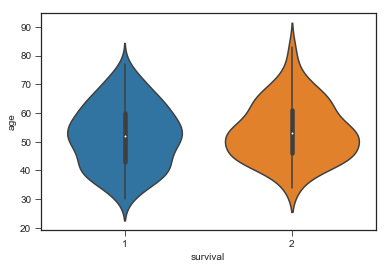

In [190]:
sns.violinplot(x='survival', y='age', data=cancer)

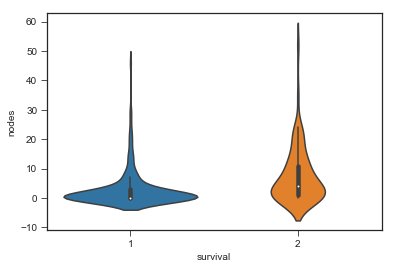

In [187]:
sns.violinplot(x='survival', y='nodes', data=cancer)

**observation**
1.